In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import spicy.stats as stats

## Part I Data Cleaning and Wrangling 
### 1. Missing Values: 
  - There variables have over 50% of missing values. 
    => We decided to drop these three features: Windsor Weather, Toronto Weather and Ottawa Waether. 
  - Drop all missing values for the rest of the variables.(52608 observations down to 52145)
  
### 2. Outliers:
  - Conducted boxplots on numerical columns and remove the outliers based on the z-score < 3 
    =>(52145 to 51022 entries left)
  - We noticed that some observations of three cities' demands are = 0, which are abnormal.  
    => Drop all observations that are abnormal
    
### 3. Inconsistent data types
  - One of the important columns for our data set, (HOEP_price), has inconsistent data values.
  => Make all rows in HOEP_price of type float
   
## Part II Exploratory Data Analysis  

### 1.Descriptive Data analysis 
   - min/max/mean

### 2.. Correlations 
  - Examine correlations between different variables 
  
## Part III Statistical Analysis Method. 

### 1. Test individual variables towards the demand's/pricing significance 
  - t-values 
  - 
  
    
### 2. Fit the optimal Model 

    - Apply ML best vairiable selctions 
 
 < maybe seperate the model based on the temperature range,have different belta > 
 
     -  t-value  hypothesis -  p-values. 
    -  Calculate confidence level 
    -  Anova 
    
 
    - Check model fitness through R^2 
    - Check model assumption 

### 3. Generate the graphs about the model
   - obtain belta 

## Part IV Limitations 
   - data limitations 
   - model limitations 


In [2]:
dataset = pd.read_csv("Group 14 Data.csv")
df = pd.DataFrame(dataset)
df.info()
#df.head(10)
# 0. Making data types in HOEP_price consisttent as float
for i in range(len(df['HOEP_price'])):
    if isinstance(df['HOEP_price'][i], str) and ',' in df['HOEP_price'][i]:
        df['HOEP_price'][i] = df['HOEP_price'][i].replace(',', '')

    
df['HOEP_price'] = pd.to_numeric(df['HOEP_price'], downcast='float')
# 1.  Missing Values 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
df = df.drop(['Windsor Weather','Toronto Weather','Ottawa Weather'],axis =1 )
df = df.dropna()

# Boxplot graphs 
Demand_col = ['West Demand (MW)','Toronto Demand (MW)','Ottawa Demand (MW)']
Temp_col=['Windsor Temp (°C)','Toronto Temp (°C)','Ottawa Temp (°C)']
Humidity_col=['Windsor Rel Hum (%)','Toronto Rel Hum (%)','Ottawa Rel Hum (%)']
HOEP = ['HOEP_price']
#df.boxplot(HOEP)
#df.boxplot(Humidity_col)
#df.boxplot(Temp_col)
#df.boxplot(Demand_col,figsize=(10,5))

# remove demand that are 0 
df = df[df['West Demand (MW)']  != 0]
df = df[df['Toronto Demand (MW)']  != 0]
df = df[df['Ottawa Demand (MW)']  != 0]


cols = df.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = df.loc[:, cols]

# code source: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

# OPTION 1: z-score filter: z-score < 3
lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3
# replace outliers with nan

df.loc[:, cols] = df_sub.where(lim, np.nan)
df.dropna(inplace=True)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_27/2285931981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOEP_price'][i] = df['HOEP_price'][i].replace(',', '')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 52608 non-null  int64  
 1   Month                52608 non-null  int64  
 2   Day                  52608 non-null  int64  
 3   Time (LST)           52608 non-null  object 
 4   HOEP_price           52608 non-null  object 
 5   Ontario Demand (MW)  52608 non-null  int64  
 6   West Demand (MW)     52608 non-null  int64  
 7   Windsor Temp (°C)    52467 non-null  float64
 8   Windsor Rel Hum (%)  52466 non-null  float64
 9   Windsor Weather      18156 non-null  object 
 10  Toronto Demand (MW)  52608 non-null  int64  
 11  Toronto Temp (°C)    52461 non-null  float64
 12  Toronto Rel Hum (%)  52311 non-null  float64
 13  Toronto Weather      8270 non-null   object 
 14  Ottawa Demand (MW)   52608 non-null  int64  
 15  Ottawa Temp (°C)     52575 non-null 

## 2nd Part Exploratory Data Analysis


<AxesSubplot:xlabel='Windsor Temp (°C)', ylabel='West Demand (MW)'>

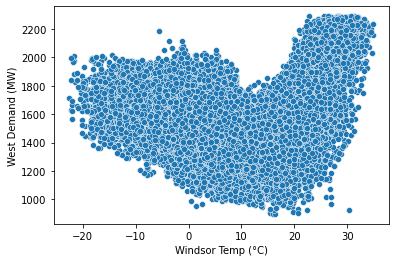

In [3]:
#sns.scatterplot(x= 'West Demand (MW)',y = 'Windsor Rel Hum (%)',data = df)
#sns.scatterplot(x= 'West Demand (MW)',y = 'HOEP_price',data = df)
sns.scatterplot(x= 'Windsor Temp (°C)',y = 'West Demand (MW)',data = df)

# Simple Regression

### I. Pricing and demand 
#### result: there is slight relationship between them and the pricing is 
#### more associated with the 'west demand' than the other areas's demands. 

coefficient of determination: 0.33869376384592176
intercept: -43.26419275527179
slope: [0.03834611]
coefficient of determination: 0.2981469512712438
intercept: -34.59270595325104
slope: [0.00878536]
coefficient of determination: 0.27191867827953686
intercept: -22.422755318352905
slope: [0.04074379]


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

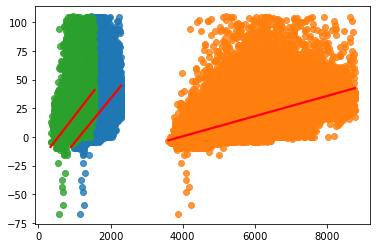

In [92]:


from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#df = df[df['HOEP_price'] >= 0]
x = df['West Demand (MW)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
#plt.scatter(x,y)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

#Demand_col = ['West Demand (MW)','Toronto Demand (MW)','Ottawa Demand (MW)']
x = df['Toronto Demand (MW)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
#plt.scatter(x,y)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Ottawa Demand (MW)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
#plt.scatter(x,y)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

### II.Humidity & Demand + Humidity & Pricing
#### Result:  1. we could conclude there is No relationship between the pricing and humidity
#### Result:  2. we could conclude there is No relationship between the demand and humidity


coefficient of determination: 0.007475811359587636
intercept: 1624.9003617369558
slope: [-1.24484035]
coefficient of determination: 0.018400299143230048
intercept: 6354.483228140771
slope: [-8.90386213]
coefficient of determination: 0.02159794941099158
intercept: 1044.9594004379414
slope: [-1.57890184]


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

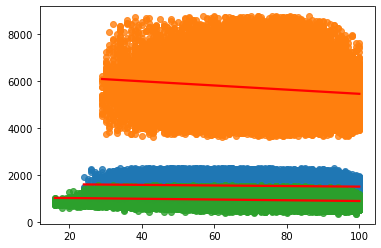

In [5]:
#Demand_col = ['West Demand (MW)','Toronto Demand (MW)','Ottawa Demand (MW)']
#Humidity_col=['Windsor Rel Hum (%)','Toronto Rel Hum (%)','Ottawa Rel Hum (%)']

x = df['Windsor Rel Hum (%)'].to_numpy().reshape((-1, 1))
y =df['West Demand (MW)'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Toronto Rel Hum (%)'].to_numpy().reshape((-1, 1))
y =df['Toronto Demand (MW)'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Ottawa Rel Hum (%)'].to_numpy().reshape((-1, 1))
y =df['Ottawa Demand (MW)'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)


coefficient of determination: 0.0015653327855953414
intercept: 18.28968447566362
slope: [-0.03753253]
coefficient of determination: 0.005133884454617932
intercept: 21.0471210007467
slope: [-0.07567184]
coefficient of determination: 0.011859998992658216
intercept: 22.106516568175806
slope: [-0.09141834]


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

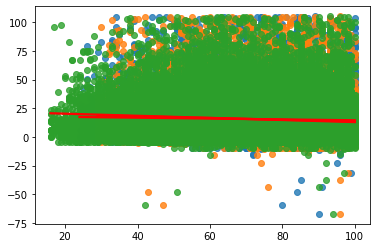

In [6]:
# Price and humidity 
#Humidity_col=['Windsor Rel Hum (%)','Toronto Rel Hum (%)','Ottawa Rel Hum (%)']
from sklearn.linear_model import LinearRegression

x = df['Windsor Rel Hum (%)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)


x = df['Toronto Rel Hum (%)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Ottawa Rel Hum (%)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

### III.Temperature & Demand + Temperature & Pricing
#### Result:  1. we could conclude there is No Simple Linear relationship between the pricing and humidity, 
   ####         => Since the graphs demonstrates other trend, further testing with polynomial basis function 
#### Result:  2. we could conclude there is No relationship between the demand and temperature


coefficient of determination: 0.038307648060206145
intercept: 1489.5835699581378
slope: [4.32479923]
coefficient of determination: 0.016192890576621988
intercept: 5589.002537990477
slope: [12.58145866]
coefficient of determination: 0.0405847375505447
intercept: 953.0791243608746
slope: [-3.29341164]


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

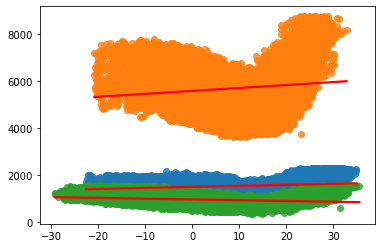

In [7]:
#Temeprature and demand 

x = df['Windsor Temp (°C)'].to_numpy().reshape((-1, 1))
y =df['West Demand (MW)'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Toronto Temp (°C)'].to_numpy().reshape((-1, 1))
y =df['Toronto Demand (MW)'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Ottawa Temp (°C)'].to_numpy().reshape((-1, 1))
y =df['Ottawa Demand (MW)'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)


coefficient of determination: 0.008260031444434657
intercept: 16.83568593333772
slope: [-0.13232206]
coefficient of determination: 0.008722346564539296
intercept: 16.863168344019343
slope: [-0.14856976]
coefficient of determination: 0.009574603574705853
intercept: 16.34786397786147
slope: [-0.1249877]


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

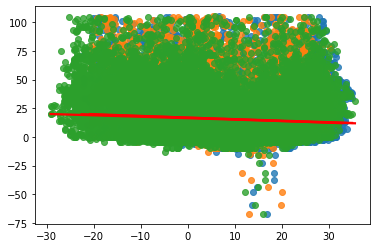

In [8]:
# Temerature and Prices 

x = df['Windsor Temp (°C)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Toronto Temp (°C)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)

x = df['Ottawa Temp (°C)'].to_numpy().reshape((-1, 1))
y =df['HOEP_price'].to_numpy()
model_1 = LinearRegression()
model_1.fit(x,y)
r_sq = model_1.score(x,y)
print('coefficient of determination:', r_sq)
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)
sns.regplot(x, y,  line_kws = {"color":"r"}, ci=None)


           6            5           4           3          2
-1.49e-06 x - 2.46e-05 x + 0.00273 x + 0.03957 x - 0.6297 x - 16.87 x + 1536
coefficient of determination: 0.42798323961325413


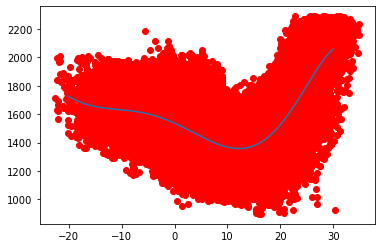

In [67]:
from sklearn.preprocessing import PolynomialFeatures
import numpy
from sklearn.metrics import r2_score
#Temeprature and demand 
#https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
x1 = np.array(df['Windsor Temp (°C)'])
y1 = np.array(df['West Demand (MW)'])

# We use the least sqaure polynomial fit with dg =6
#z = numpy.polyfit(x1, y1, 11)
# which is the coeffiecit : y = ..x^11 + ..x^10+....+X^0
#print(np.poly1d(z))

mymodel = numpy.poly1d(numpy.polyfit(x1, y1, 6))
print(mymodel)
myline = numpy.linspace(-20, 30, 200)
plt.plot(myline, mymodel(myline))
plt.scatter(x1,y1,c='red')
print('coefficient of determination:',r2_score(y1, mymodel(x1)))

            7             6             5           4          3
-9.729e-07 x + 1.394e-05 x + 0.0007547 x - 0.00311 x - 0.0245 x
            2
 - 0.08047 x - 60.69 x + 5721
coefficient of determination: 0.3602212159183277


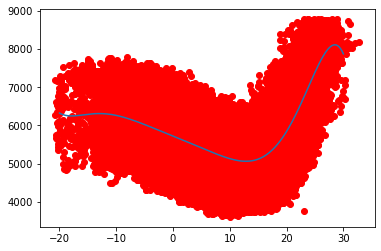

In [81]:
x1 = np.array(df['Toronto Temp (°C)'])
y1 = np.array(df['Toronto Demand (MW)'])

mymodel = numpy.poly1d(numpy.polyfit(x1, y1,7))
print(mymodel)
myline = numpy.linspace(-20, 30, 200)
plt.plot(myline, mymodel(myline))
plt.scatter(x1,y1,c='red')
print('coefficient of determination:',r2_score(y1, mymodel(x1)))

           4           3          2
0.0001282 x + 0.02321 x + 0.2544 x - 16.72 x + 914.9
coefficient of determination: 0.4033640049263528


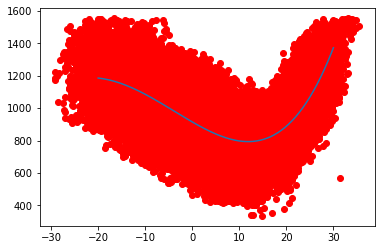

In [90]:
x1 = np.array(df['Ottawa Temp (°C)'])
y1 = np.array(df['Ottawa Demand (MW)'])

mymodel = numpy.poly1d(numpy.polyfit(x1, y1, 4))
print(mymodel)
myline = numpy.linspace(-20, 30, 200)
plt.plot(myline, mymodel(myline))
plt.scatter(x1,y1,c='red')
print('coefficient of determination:',r2_score(y1, mymodel(x1)))